In [1]:
import pandas as pd
import sklearn.metrics
import matplotlib.pyplot as plt
import itertools
import numpy as np
from typing import Any, Dict, List, Tuple, Union
from sklearn import metrics
import sys
sys.path.append('../src')
import ast

from algorithms.kmeans import Kmeans
from algorithms.dbscan import DBscan
from algorithms.isolation_forest import IsolationForest
from algorithms.gan import GAN

from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import euclidean_distances
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.utils.estimator_checks import check_estimator
import csv
import os


2024-04-09 14:33:11.573071: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-04-09 14:33:11.573108: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
dataframes = []


# Create nine pandas DataFrame objects in a loop
for i in range(1, 10, 1):
    df = pd.read_csv(f"../data/ads-{i}.csv")
    dataframes.append(df)

    



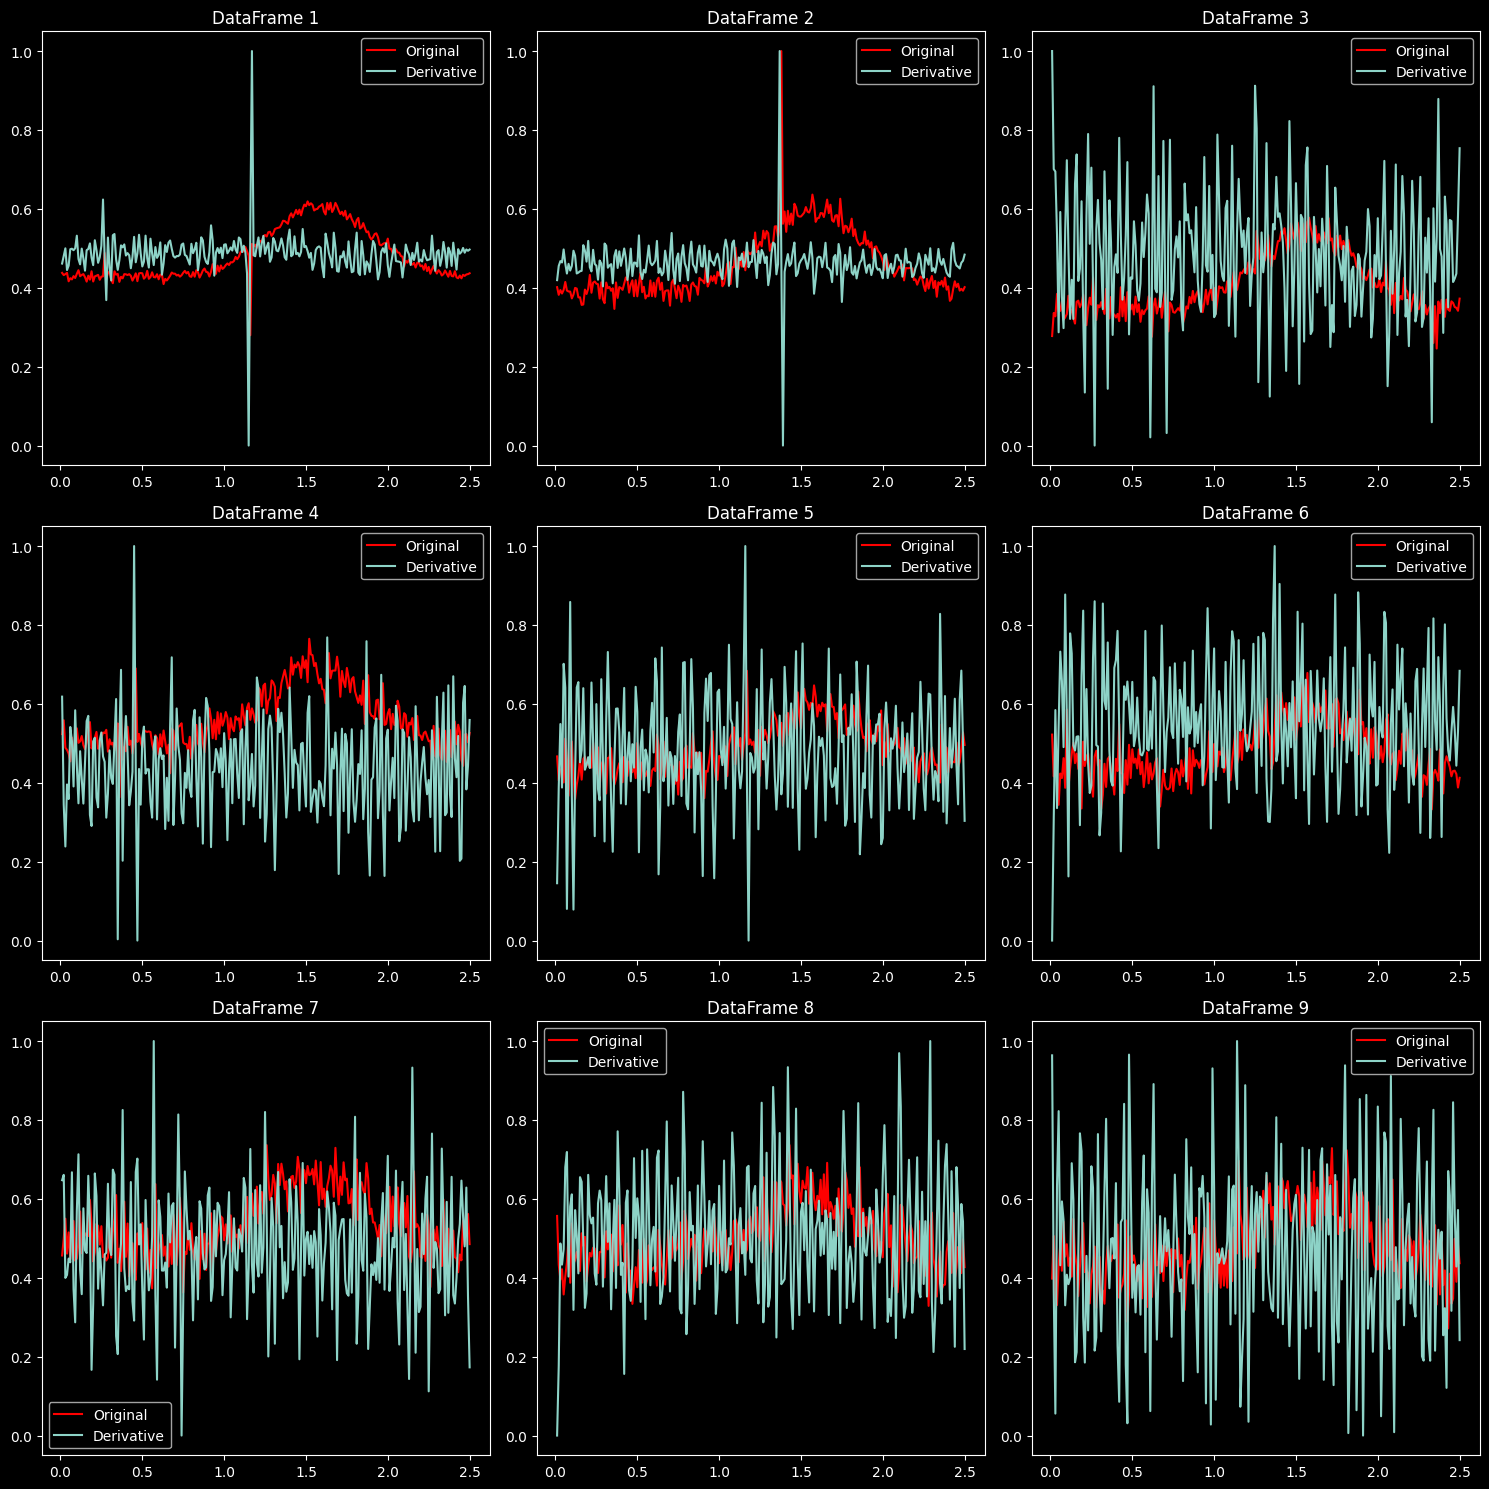

In [3]:

fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for i in range(3):
    for j in range(3):
        # Calculate the index for accessing the dfs dictionary
        index = i * 3 + j 
        # Check if the index exists in the dictionary before plotting

        min_value = dataframes[index]['ftr_vector'].min()
        max_value = dataframes[index]['ftr_vector'].max()
        dataframes[index]['ftr_vector'] = (dataframes[index]['ftr_vector'] - min_value) / (max_value - min_value)


        axs[i, j].plot(dataframes[index]['timestamp'].iloc[:250], dataframes[index]['ftr_vector'].iloc[:250], label="Original", color='red')
        
        dy_dx = np.gradient(dataframes[index]['ftr_vector'].iloc[:250], dataframes[index]['timestamp'].iloc[:250])

        min_value = dy_dx.min()
        max_value = dy_dx.max()
        dy_dx = (dy_dx - min_value) / (max_value - min_value)

        axs[i, j].plot(dataframes[index]['timestamp'].iloc[:250], dy_dx, label="Derivative")

        axs[i, j].set_title(f'DataFrame {index+1}')
        axs[i, j].legend()

plt.tight_layout()
plt.show()



In [4]:
dataframes = []
dataframes_train = []
dataframes_validation = []
dataframes_test = []

# Create nine pandas DataFrame objects in a loop
for i in range(1, 10, 1):
    df = pd.read_csv(f"../data/ads-{i}.csv")
    dataframes.append(df)

    
    dy_dx = np.gradient(df['ftr_vector'], df['timestamp'])
    ftr_vector_strings = []
    for i in range(len(df)):
        ftr_vector_strings.append(str([df['ftr_vector'].iloc[i], dy_dx[i]]))

    # Assign the list of strings back to the 'ftr_vector' column
    df['ftr_vector'] = ftr_vector_strings

    total_size = len(df)
    train_size = int(total_size * 0.6)
    val_size = int(total_size * 0.2)

    # Split the DataFrame
    train_df = df[:train_size]
    dataframes_train.append(train_df)

    val_df = df[train_size:train_size+val_size].reset_index(drop=True)
    dataframes_validation.append(val_df)


    test_df = df[train_size+val_size:].reset_index(drop=True)
    dataframes_test.append(test_df)



In [5]:
dataframes[0]['ftr_vector'].head()

0      [0.113201815873, -7.433903261589999]
1    [0.0388627832571, -1.9458163039049992]
2      [0.0742854897949, 3.794038444195001]
3     [0.114743552141, -12.205645167044997]
4     [-0.169827413546, -9.020778645864988]
Name: ftr_vector, dtype: object

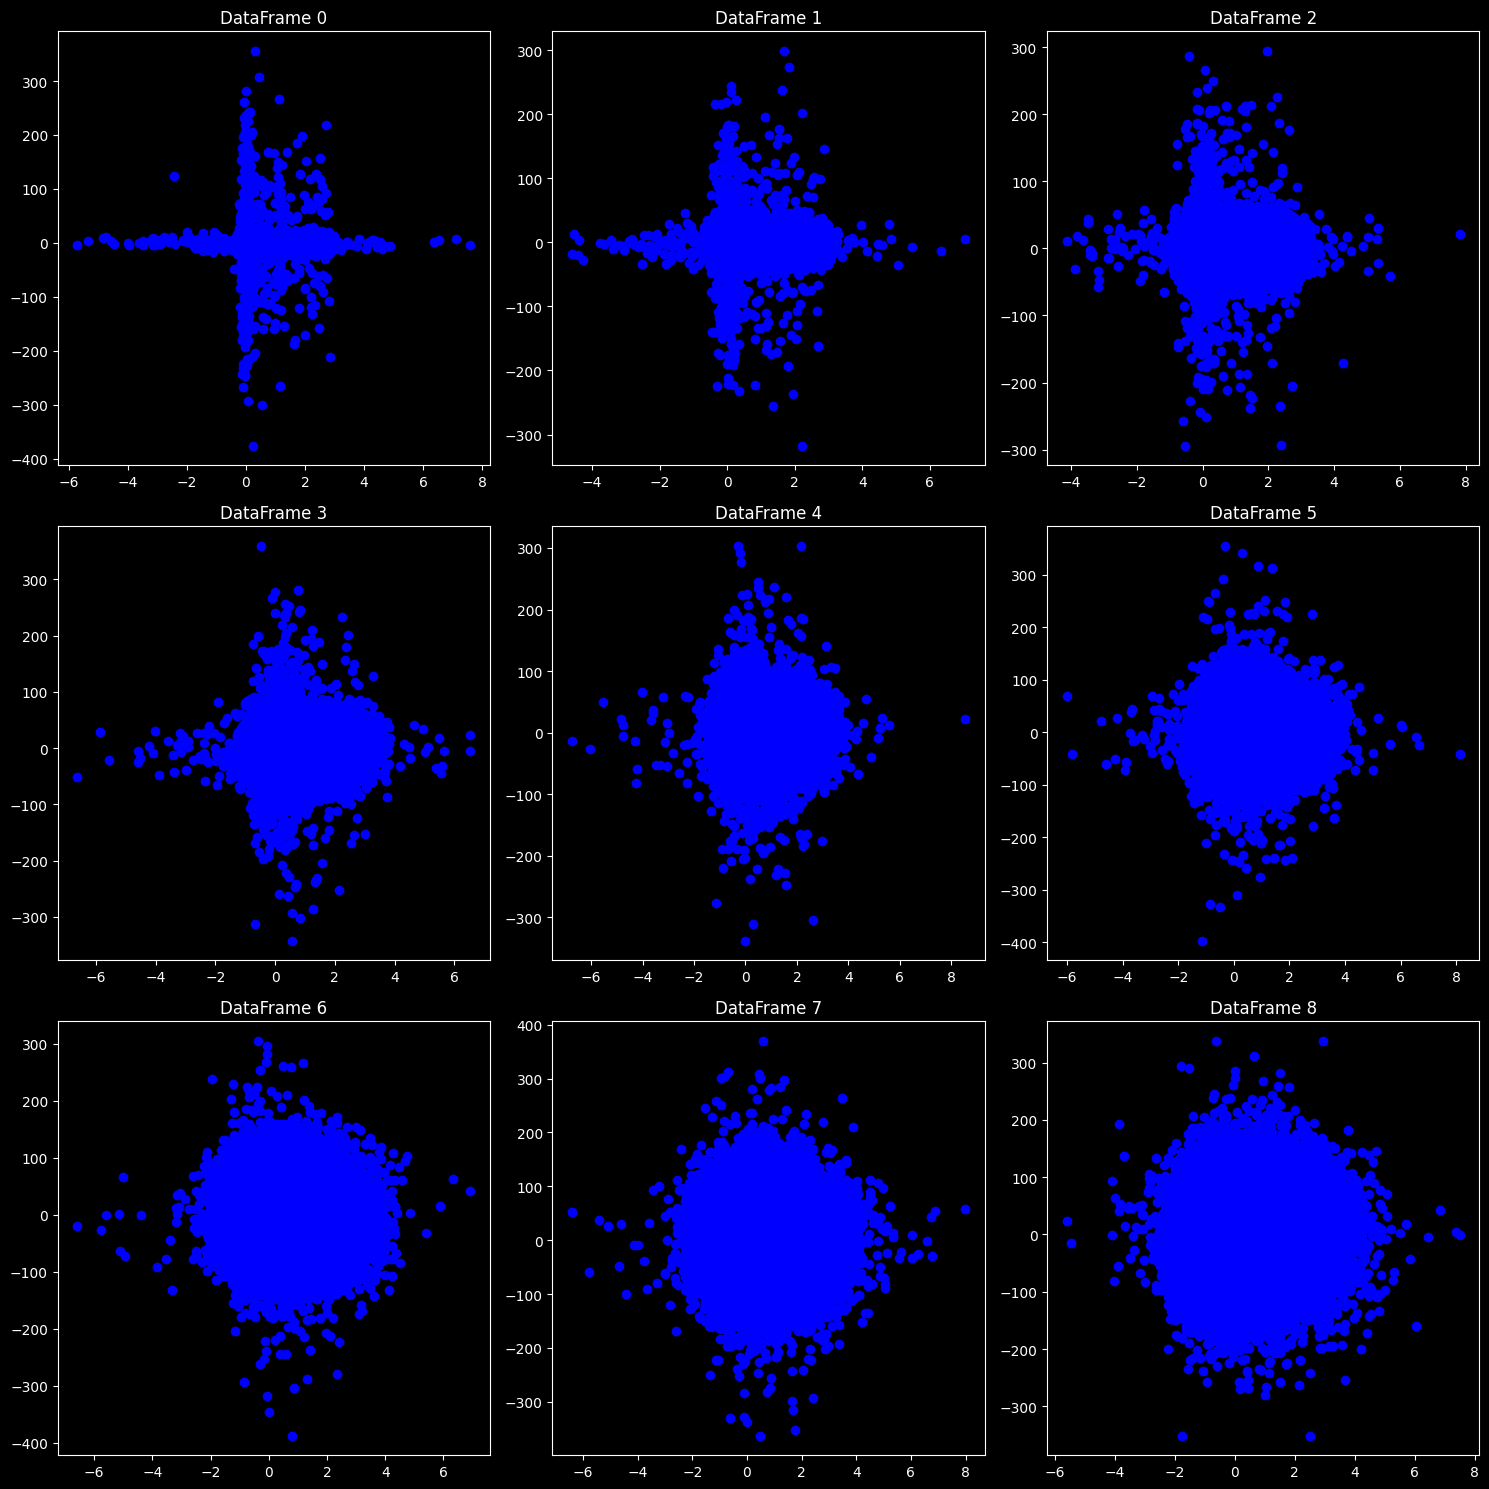

In [6]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for i in range(3):
    for j in range(3):
        # Calculate the index for accessing the dfs dictionary
        index = i * 3 + j 

        

        original_values = [ast.literal_eval(point)[0] for point in dataframes[index]['ftr_vector'][1:]]
        derivative_values = [ast.literal_eval(point)[1] for point in dataframes[index]['ftr_vector'][1:]]


        axs[i, j].plot(original_values, derivative_values, "bo")

        axs[i, j].set_title(f'DataFrame {index}')

plt.tight_layout()
plt.show()

In [6]:
# String representation of the list
list_string = "[ 1                 2 3 4 5]"

# Parse the string into a list
parsed_list = [int(item) for item in list_string.strip("[]").split()]

print(parsed_list)  # Output: [1, 2, 3, 4, 5]


[1, 2, 3, 4, 5]
